In [2]:
from IPython.display import Image

## Stack
- LIFO(Last-In, First-Out: 후입선출)
- 파이썬에서는 리스트가 스택을 표현하는데 사용되므로 따로 구현할 필요가 없다.

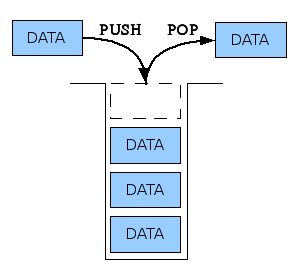

<br/>**기능**
- `push()`: 데이터를 스택에 쌓는 기능으로, 리스트의 `append()` 메소드와 같다.
- `pop()`: 데이터를 스택에서 꺼내는 기능으로, 리스트의 `pop()` 메소드와 같다.

```
stack = []
stack.append(1)
stack.append(2)
stack.pop()
```

## Queue
- FIFO(First-In, First-Out: 선입선출)

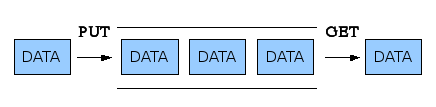

<br/>**기능**
- `Enqueue`: 큐에 데이터를 넣는 기능으로, 리스트의 `append()` 메서드와 유사하다.
- `Dequeue`: 큐에서 데이터를 꺼내는 기능을 의미합니다. python list의 `pop(0)` 메소드와 유사하다.

<br/>**종류**
### 1. Queue
- 일반적인 큐 자료구조이지만, 큐 자료형 구현에 널리 쓰이진 않는다.
- 파이썬에서는 주로 list나 deque로 큐를 구현한다.

```
from queue import Queue

que = Queue()
que.put(1) # 1 
que.put(2) # 1 - 2 
que.put(3) # 1 - 2 - 3 
que.get()  # 1 출력 
que.get()  # 2 출력
```

### 2. Deque
- Double-Ended Queue의 줄임말로, 양쪽 끝에서 삽입과 삭제가 모두 가능한 자료 구조
- deque로 스택과 큐를 모두 구현할 수 있음

```
from collections import deque

deq = deque()
deq.append(2)
deq.appendleft(3)
deq.pop()
deq.popleft()
```

### 3. PriorityQueue
- 데이터마다 우선순위를 지정하여 우선순위 순으로 출력하는 자료 구조
- queue 모듈에 PriorityQueue 클래스가 있긴 하지만, 우선순위 큐는 대부분 heapq로 구현

## 시간 복잡도 비교
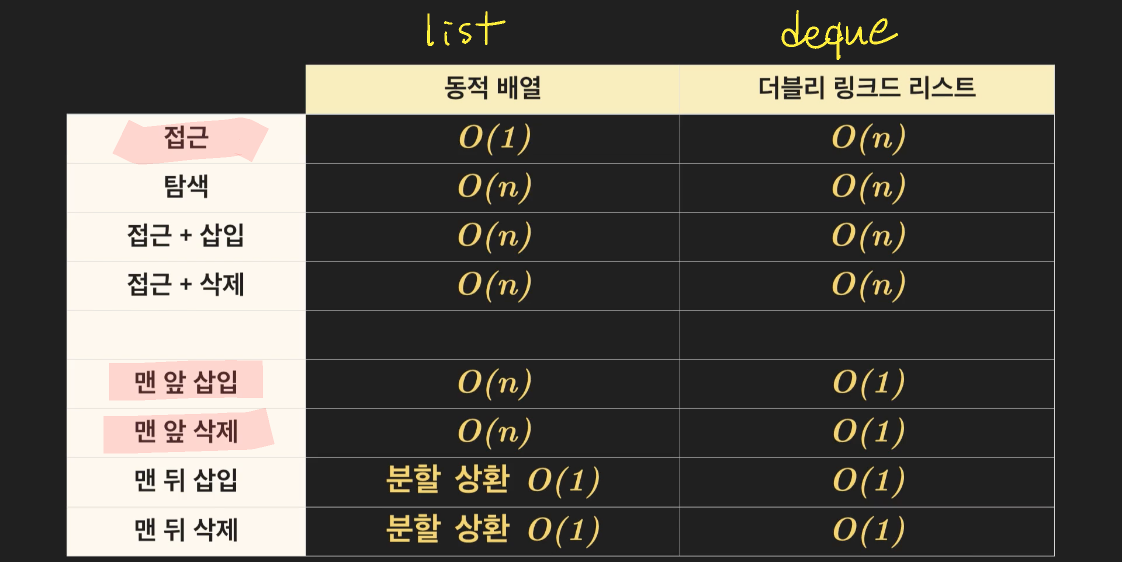

## 20. Valid Parentheses (유효한 괄호)
- 대괄호, 중괄호, 소괄호로 이루어진 string 입력 받음
- 열린 괄호가 같은 종류의 괄호로 닫히고, 순서에 맞게 닫힌 경우 True

Examples

```
Input: s = "()[]{}"
Output: true
```
```
Input: s = "{[]}"
Output: true
```
```
Input: s = "([)]"
Output: false
```

### Idea
1. 괄호의 종류가 3가지 뿐이므로 if문으로 모든 경우 나열 가능 -> 코드가 길고 복잡해짐
2. 괄호는 한 쌍씩 대응되므로 딕셔너리 만들기 -> 효율적인 풀이

### Solution

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
        pairs = {"(": ")",
                 "[": "]",
                 "{": "}"}
        stack = []
        for c in s:
            if c in pairs.keys():
                stack.append(c)
            elif stack and pairs.get(stack[-1]) == c:
                stack.pop()
            else:
                return False
        return not stack

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
        pairs = {"(": ")",
                 "[": "]",
                 "{": "}"}
        stack = []
        for c in s:
            if c in pairs:
                stack.append(pairs[c])
            elif not stack or stack.pop() != c:
                return False
        return not stack

## 225. Implement Stack using Queues (큐를 이용한 스택 구현)
- 두 개의 큐를 사용해 push, top, pop, empty 연산을 지원하는 스택을 구현하는 문제

In [ ]:
# 두 개의 큐를 사용한 풀이
class MyStack:

    def __init__(self):
        self.q1 = []
        self.q2 = []

    def push(self, x: int) -> None:
        self.q1.append(x)
        
    def pop(self) -> int:
        for _ in range(len(self.q1)-1):
            self.q2.append(self.q1.pop(0))
        result = self.q1.pop(0)
        self.q1 = self.q2
        self.q2 = []
        return result

    def top(self) -> int:
        for _ in range(len(self.q1)-1):
            self.q2.append(self.q1.pop(0))
        result = self.q1.pop(0)
        self.q2.append(result)
        self.q1 = self.q2
        self.q2 = []
        return result

    def empty(self) -> bool:
        return len(self.q1) == 0

In [ ]:
# 교재 풀이
class MyStack:

    def __init__(self):
        self.q = collections.deque()        

    def push(self, x: int) -> None:
        self.q.append(x)
        for _ in range(len(self.q)-1):
            self.q.append(self.q.popleft())
        
    def pop(self) -> int:
        return self.q.popleft()        

    def top(self) -> int:
        return self.q[0]        

    def empty(self) -> bool:
        return len(self.q) == 0